In [1]:
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = fetch_openml('mnist_784' , version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X , y = mnist['data'] , mnist['target']

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

# Plot images

In [6]:
def plot_image(data):
    some_digit = data
    some_digit_image = np.array(data).reshape(28 , 28)
    plt.imshow(some_digit_image , cmap = 'binary')
    plt.axis('off')
    plt.show()

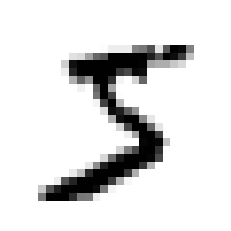

0    5
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [7]:
plot_image(X[:1])
print(y[0:1])

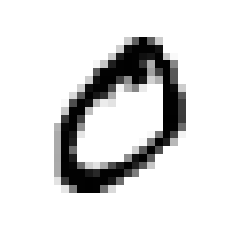

1    0
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [8]:
plot_image(X[1:2])
print(y[1:2])

In [9]:
y = y.astype('int')

# Splitting the Data

In [10]:
X_train , X_test , y_train , y_test  = X[:6000] , X[6000:] , y[:6000] , y[6000:]

In [11]:
X_train.shape

(6000, 784)

In [12]:
X_test.shape

(64000, 784)

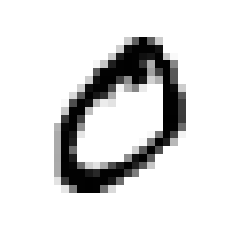

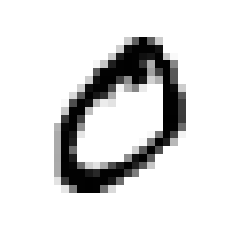

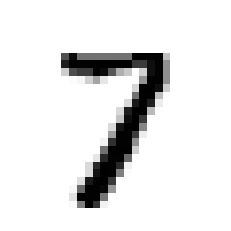

In [13]:
plot_image(X_train[1:2])
plot_image(X_train[1:2])
plot_image(X_test[455:456])

# Training Model for Binary Classification

In [14]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [15]:
from sklearn.linear_model import SGDClassifier

In [16]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train , y_train_5)

SGDClassifier(random_state=42)

In [17]:
sgd_clf.predict(X[0:1])

array([ True])

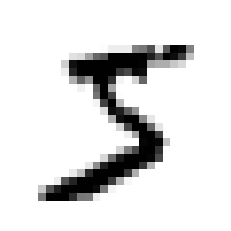

In [18]:
plot_image(X[0:1])

In [19]:
sgd_clf.predict(X[455:456])

array([False])

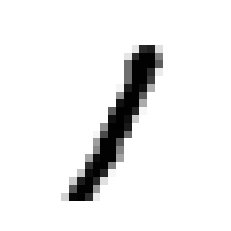

In [20]:
plot_image(X[455:456])

In [21]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf , X_train , y_train_5 , cv = 3 , scoring = 'accuracy')

array([0.962 , 0.956 , 0.9665])

# Evaluating Model using Confusion Matrix

In [22]:
from sklearn.model_selection import cross_val_predict

In [23]:
Y_train_pred = cross_val_predict(sgd_clf , X_train , y_train_5 , cv =3)

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [25]:
cm  = confusion_matrix(y_train_5 , Y_train_pred)

In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

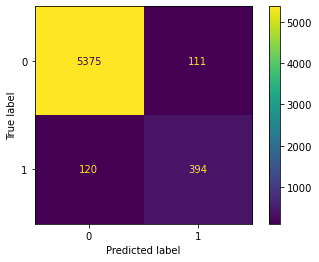

In [27]:
disp.plot(cmap='viridis')

In [28]:
y_train_perfect_predictiions = y_train_5
cm_per = confusion_matrix(y_train_5 , y_train_perfect_predictiions)
disp_new = ConfusionMatrixDisplay(confusion_matrix = cm_per)

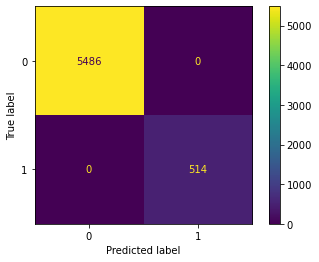

In [29]:
disp_new.plot()

In [30]:
from sklearn.metrics import precision_score , recall_score , f1_score

In [31]:
precision_score(y_train_5 , Y_train_pred)

0.7801980198019802

In [32]:
recall_score(y_train_5 , Y_train_pred)

0.7665369649805448

In [33]:
f1_score(y_train_5 , Y_train_pred)

0.7733071638861628

# Precision Recall Curve

In [34]:
y_scores = cross_val_predict(sgd_clf , X_train, y_train_5 , cv = 3, method = 'decision_function')

In [35]:
from sklearn.metrics import precision_recall_curve

In [36]:
precisions , recalls , thresholds = precision_recall_curve(y_train_5 , y_scores)

In [37]:
def plot_precision_recall_vs_threshold(precisions, recalls , thresholds):
    plt.plot(thresholds , precisions[:-1] , "b--" , label = "Precision")
    plt.plot(thresholds ,recalls[:-1] , "g-" , label = "Recalls")
    plt.legend()
    plt.title("Threshold" ,loc='center')

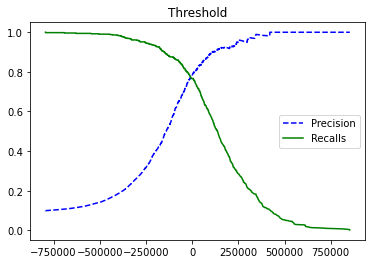

In [38]:
plot_precision_recall_vs_threshold(precisions , recalls , thresholds)

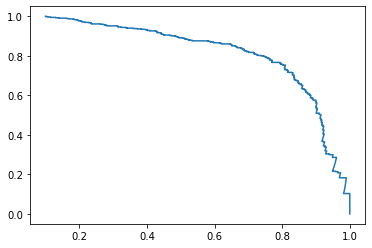

In [39]:
plt.plot(precisions , recalls)

# ROC Curve

In [40]:
from sklearn.metrics import roc_curve

In [41]:
fpr , tpr , thresholds = roc_curve(y_train_5 , y_scores)

In [42]:
def plot_curve(fpr , tpr , label = None):
    plt.plot(fpr , tpr , linewidth = 2 , label = label)
    plt.plot([0 ,1], [0 ,1 ] , 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

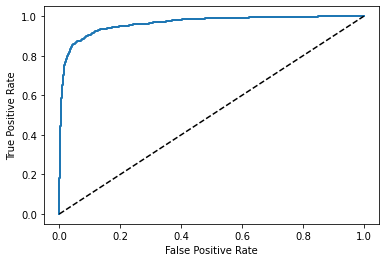

In [43]:
plot_curve(fpr , tpr)

In [44]:
from sklearn.metrics import roc_auc_score

In [45]:
roc_auc_score(y_train_5, y_scores)

0.9641599203348885

# Comparing ROC of SGD and Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf , X_train , y_train_5 , cv= 3 , method = 'predict_proba')

In [48]:
y_scores_forest = y_probas_forest[:,1]
y_scores_forest

array([0.63, 0.02, 0.05, ..., 0.33, 0.01, 0.1 ])

In [49]:
fpr_forest , tpr_forest , threshold_forest = roc_curve(y_train_5 , y_scores_forest)

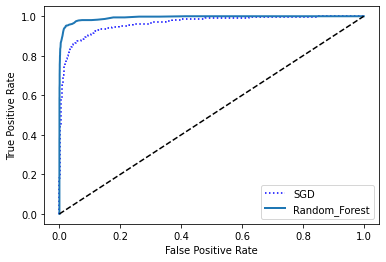

In [50]:
plt.plot(fpr , tpr , 'b:' , label = 'SGD')
plot_curve(fpr_forest , tpr_forest , "Random_Forest")
plt.legend(loc = 'lower right')

In [51]:
roc_auc_score(y_train_5 , y_scores_forest)

0.9936162229715256

# MultiClass Classification 

In [52]:
from sklearn.svm import SVC

In [53]:
some_digit = X[0:1]
some_digit

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  pixel784  
0       0.0       0.0       0.0       0.0  

[1 rows x 784 columns]

In [54]:
svm_clf = SVC()
svm_clf.fit(X_train ,y_train)
svm_clf.predict(some_digit)

array([5])

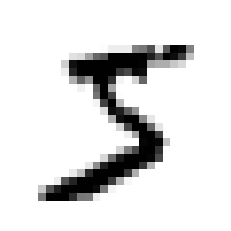

In [55]:
plot_image(some_digit)

In [56]:
some_digit_scores = svm_clf.decision_function(some_digit)
some_digit_scores

array([[ 1.74201669,  3.75934047,  6.18134457,  8.29644372, -0.30252035,
         9.30527336,  1.74930094,  2.77838477,  7.19221016,  3.87315474]])

In [57]:
np.argmax(some_digit_scores)

5

In [58]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Using One Vs Rest 

In [59]:
from sklearn.multiclass import OneVsRestClassifier

In [60]:
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train , y_train)

OneVsRestClassifier(estimator=SVC())

In [61]:
len(ovr_clf.estimators_)

10

# Using SGD / Random Forest 

In [62]:
sgd_clf.fit(X_train , y_train)
sgd_clf.predict(some_digit)

array([5])

In [63]:
sgd_clf.decision_function(some_digit)

array([[-735711.69660953, -857058.38635209, -281086.00104909,
           8289.73273042, -616793.26669143,   29040.2961313 ,
        -492305.02284074, -834395.17091855, -318385.3774766 ,
        -363474.38706356]])

In [64]:
np.argmax(sgd_clf.decision_function(some_digit))

5

In [65]:
cross_val_score(sgd_clf , X_train , y_train , cv = 3 , scoring = 'accuracy')

array([0.8565, 0.8715, 0.8635])

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf , X_train_scaled , y_train , cv = 3 , scoring = 'accuracy')

array([0.8705, 0.8985, 0.8925])

In [68]:
y_train_pred = cross_val_predict(sgd_clf , X_train_scaled , y_train , cv = 3)
conf_mat = confusion_matrix(y_train , y_train_pred)

In [69]:
conf_mat

array([[572,   0,   1,   2,   1,   9,   3,   1,   3,   0],
       [  0, 637,   6,   3,   1,   5,   0,   1,  16,   2],
       [ 10,  12, 493,  11,  10,   4,  10,   9,  20,   2],
       [  3,   5,  21, 514,   1,  35,   1,   7,  11,  10],
       [  3,   2,   7,   0, 556,   2,  10,   8,   9,  26],
       [  5,   6,   5,  24,  14, 411,  10,   1,  25,  13],
       [  4,   4,   6,   0,   5,   6, 577,   1,   5,   0],
       [  3,   4,   7,   2,   9,   0,   1, 577,   3,  45],
       [  2,  19,  13,  16,   4,  10,   6,   3, 464,  14],
       [  7,   4,   5,   7,  15,   3,   0,  27,  11, 522]], dtype=int64)

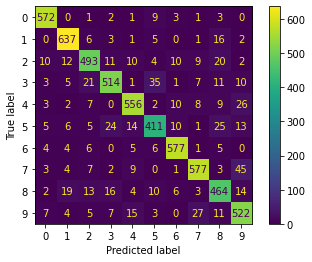

In [70]:
cm_plot = ConfusionMatrixDisplay(confusion_matrix= conf_mat)
cm_plot.plot()

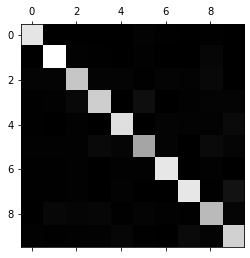

In [71]:
plt.matshow(conf_mat , cmap = plt.cm.gray)

In [72]:
rows_sum = conf_mat.sum(axis = 1 , keepdims = True)
norm_conf_mx = conf_mat/rows_sum

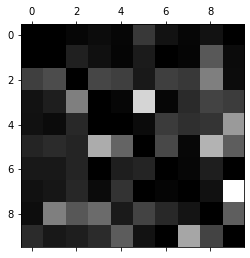

In [73]:
np.fill_diagonal(norm_conf_mx , 0)
plt.matshow(norm_conf_mx , cmap = plt.cm.gray)

# MultiLabeled Classification

In [74]:
y_train_large  = (y_train >= 7)
y_train_odd = (y_train %2 == 1)
y_multilabeled = np.c_[y_train_large, y_train_odd]

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train , y_multilabeled)

KNeighborsClassifier()

In [76]:
knn_clf.predict(some_digit)

array([[False,  True]])

## Evaluating 

In [77]:
y_train_knn_predicted = cross_val_score(knn_clf , X_train , y_multilabeled , cv = 3)

In [78]:
y_train_knn_predicted

array([0.941, 0.942, 0.948])

# MULTIOUTPUT Classification

In [80]:
noise = np.random.randint(0 , 100 , (len(X_train) , 784))
X_train_mod = X_train+noise
noise =  np.random.randint(0 , 100 , (len(X_test) , 784))
X_test_mod = X_test+noise
y_train_mod = X_train
y_test_mod = X_test

In [82]:
some_index = X_train_mod[0:1]
some_index

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0    99.0    39.0    29.0    40.0    54.0     0.0    56.0    22.0    61.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      5.0  ...      74.0      29.0      12.0      46.0      58.0      91.0   

   pixel781  pixel782  pixel783  pixel784  
0      55.0      34.0      84.0      37.0  

[1 rows x 784 columns]

In [ ]:
knn_clf.fit(X_train_mod , y_train_mod)

In [84]:
clean_digit = knn_clf.predict(some_index)

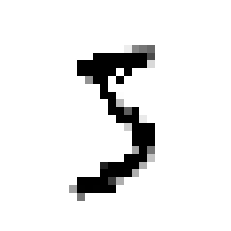

In [85]:
plot_image(clean_digit)

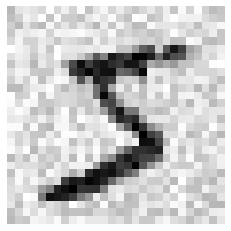

In [86]:
plot_image(some_index)